# Demographic Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read data from file
df = pd.read_csv("adult.data.csv")

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
race_count = pd.Series.value_counts(df.race)
race_count

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [5]:
# What is the average age of men?
average_age_men = round(df[df["sex"]=="Male"]["age"].mean(), 1)
average_age_men

39.4

In [6]:
# What is the percentage of people who have a Bachelor's degree?
percentage_bachelors = round((df[df["education"].str.contains("Bachelors")]["education"].count() / df["education"].count()) * 100, 1)
percentage_bachelors

16.4

In [108]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
# What percentage of people without advanced education make more than 50K?

# with `Bachelors`, `Masters`, or `Doctorate`
higher_education = df[df["education"].isin(["Bachelors", "Masters", "Doctorate"])]
# without `Bachelors`, `Masters`, or `Doctorate`
lower_education = df[~df["education"].isin(["Bachelors", "Masters", "Doctorate"])]

# Percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) who make more than 50K
higher_education_rich = round((higher_education["salary"].str.contains(">50K").count() / df["salary"].count()) * 100, 2)
# Percentage of people without advanced education who make more than 50K
lower_education_rich = round((lower_education["salary"].str.contains(">50K").count() / df["education"].count()) * 100, 2)

In [109]:
higher_education["salary"].str.contains(">50K")

0        False
1        False
4        False
5        False
8         True
         ...  
32538     True
32539     True
32544    False
32553    False
32554     True
Name: salary, Length: 7491, dtype: bool

In [9]:
higher_education[higher_education["salary"].str.contains(">50K")]["salary"].count()

3486

In [11]:
lower_education[lower_education["salary"].str.contains(">50K")]["salary"].count()

4355

In [12]:
lower_education["salary"].str.contains(">50K")

2        False
3        False
6        False
7         True
10        True
         ...  
32556    False
32557     True
32558    False
32559    False
32560     True
Name: salary, Length: 25070, dtype: bool

In [13]:
lower_education["salary"].str.contains(">50K").count()

25070

In [15]:
df["salary"].count()

32561

In [17]:
higher_education.count()

age               7491
workclass         7491
fnlwgt            7491
education         7491
education-num     7491
marital-status    7491
occupation        7491
relationship      7491
race              7491
sex               7491
capital-gain      7491
capital-loss      7491
hours-per-week    7491
native-country    7491
salary            7491
dtype: int64

In [18]:
lower_education

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
higher_education_rich

23.01

In [20]:
lower_education_rich

76.99

In [107]:
# The minimum number of hours a person works per week (hours-per-week feature)?
min_work_hours = df["hours-per-week"].min()

# The number of people who work the minimum number of hours per week and have a salary of >50K?
num_min_workers = df[(df["hours-per-week"]==min_work_hours)&(df["salary"].isin([">50K"]))]["salary"].count()
# The percentage of the people who work the minimum number of hours per week and have a salary of >50K
rich_percentage = round((num_min_workers / df[df["hours-per-week"]==min_work_hours]["hours-per-week"].count()) * 100, 2)

In [22]:
df[(df["hours-per-week"]==min_work_hours)&(df["salary"].isin([">50K"]))]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
20072,65,?,76043,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,>50K


In [104]:
print(f"The minimum number of hours a person works per week is {min_work_hours} hour.")

The minimum number of hours a person works per week is 1 hour.


In [105]:
print(f"The number of people who work the minimum number of hours per week and have a salary of >50K is {num_min_workers} people.")

The number of people who work the minimum number of hours per week and have a salary of >50K is 2 people.


In [106]:
print(f"The percentage of the people who work the minimum number of hours per week and have a salary of >50K is {rich_percentage}%.")

The percentage of the people who work the minimum number of hours per week and have a salary of >50K is 10.0%.


In [34]:
# Identify the most popular occupation for those who earn >50K in India.
top_IN_occupation = df[(df["native-country"].isin(["India"])) & (df["salary"].str.contains(">50K"))]["occupation"].mode().iloc[0]

In [51]:
print(f"The most popular occupation for people who earn >50K in India is{top_IN_occupation}.")

The most popular occupation for people who earn >50K in India isProf-specialty.


In [55]:
# The number of people in each country who earn >50K
df[df['salary'] == '>50K']['native-country'].value_counts()

native-country
United-States         7171
?                      146
Philippines             61
Germany                 44
India                   40
Canada                  39
Mexico                  33
England                 30
Italy                   25
Cuba                    25
Japan                   24
Taiwan                  20
China                   20
Iran                    18
South                   16
Puerto-Rico             12
Poland                  12
France                  12
Jamaica                 10
El-Salvador              9
Greece                   8
Cambodia                 7
Hong                     6
Yugoslavia               6
Ireland                  5
Vietnam                  5
Portugal                 4
Haiti                    4
Ecuador                  4
Thailand                 3
Hungary                  3
Guatemala                3
Scotland                 3
Nicaragua                2
Trinadad&Tobago          2
Laos                     2
Columbia     

In [56]:
# The total number of people in each country
df['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [57]:
# The percentage of people in each country that earn >50K
round((df[df['salary'] == '>50K']['native-country'].value_counts() / df['native-country'].value_counts()) * 100, 1)

native-country
?                             25.0
Cambodia                      36.8
Canada                        32.2
China                         26.7
Columbia                       3.4
Cuba                          26.3
Dominican-Republic             2.9
Ecuador                       14.3
El-Salvador                    8.5
England                       33.3
France                        41.4
Germany                       32.1
Greece                        27.6
Guatemala                      4.7
Haiti                          9.1
Holand-Netherlands             NaN
Honduras                       7.7
Hong                          30.0
Hungary                       23.1
India                         40.0
Iran                          41.9
Ireland                       20.8
Italy                         34.2
Jamaica                       12.3
Japan                         38.7
Laos                          11.1
Mexico                         5.1
Nicaragua                      5.9
Outly

In [36]:
# The country with the highest percentage of people in that country who earn >50K
hec = (df[df['salary'] == '>50K']['native-country'].value_counts() / df['native-country'].value_counts()).idxmax()
# The percentage of people who earn >50K in hec
hecp = round(((df[df['salary'] == '>50K']['native-country'].value_counts() / df['native-country'].value_counts()) * 100).max(), 1)

In [39]:
print(f"The country with the highest percentage of people who earn >50K is {hec}.")

The country with the highest percentage of people who earn >50K is Iran.


In [41]:
print(f"The percentage of people in {hec} who earn >50K is {hecp}%.")

The percentage of people in Iran who earn >50K is 41.9%.


In [102]:
# The number of people aged 70 and above
df[df["age"] >= 70]["age"].count()

629

In [43]:
sns.set_style("whitegrid")

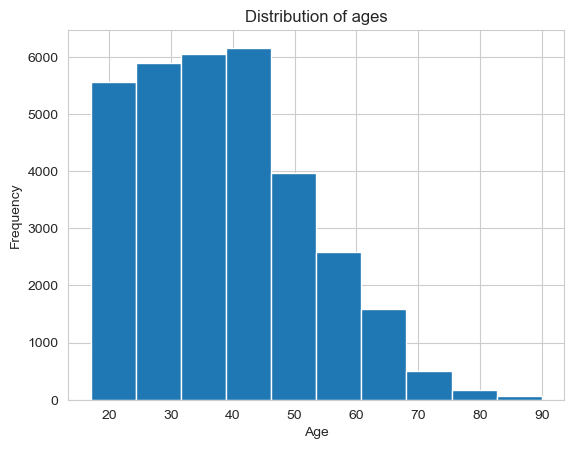

In [44]:
plt.title("Distribution of ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.hist(df["age"]);

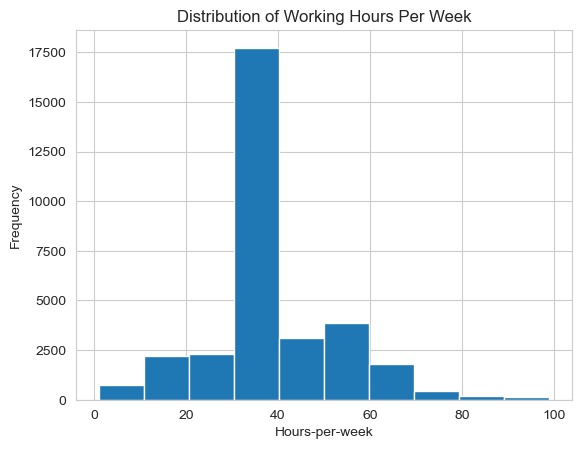

In [45]:
plt.title("Distribution of Working Hours Per Week")
plt.xlabel("Hours-per-week")
plt.ylabel("Frequency")
plt.hist(df["hours-per-week"]);

In [46]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [47]:
df["native-country"].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [48]:
# THe number of people of each educational level who earn <=50K
df[df["salary"] == "<=50K"]["education"].value_counts()

education
HS-grad         8826
Some-college    5904
Bachelors       3134
11th            1115
Assoc-voc       1021
10th             871
Assoc-acdm       802
Masters          764
7th-8th          606
9th              487
12th             400
5th-6th          317
1st-4th          162
Prof-school      153
Doctorate        107
Preschool         51
Name: count, dtype: int64

In [90]:
# The percentage of people in each educational level who earn <=50K out of total count
round((df[df["salary"] == "<=50K"]["education"].value_counts() / df.education.count()) * 100, 2)

education
HS-grad         27.11
Some-college    18.13
Bachelors        9.63
11th             3.42
Assoc-voc        3.14
10th             2.67
Assoc-acdm       2.46
Masters          2.35
7th-8th          1.86
9th              1.50
12th             1.23
5th-6th          0.97
1st-4th          0.50
Prof-school      0.47
Doctorate        0.33
Preschool        0.16
Name: count, dtype: float64

In [95]:
# The percentage of people in each educational level who earn <=50K out of total count of individual educational levels
round((df[df["salary"] == "<=50K"]["education"].value_counts() / df.education.value_counts()) * 100, 2)

education
10th             93.35
11th             94.89
12th             92.38
1st-4th          96.43
5th-6th          95.20
7th-8th          93.81
9th              94.75
Assoc-acdm       75.16
Assoc-voc        73.88
Bachelors        58.52
Doctorate        25.91
HS-grad          84.05
Masters          44.34
Preschool       100.00
Prof-school      26.56
Some-college     80.98
Name: count, dtype: float64

In [93]:
# The percentage of people in each educational level who earn >50K out of total count
round((df[df["salary"] == ">50K"]["education"].value_counts() / df.education.count()) * 100, 2)

education
Bachelors       6.82
HS-grad         5.14
Some-college    4.26
Masters         2.95
Prof-school     1.30
Assoc-voc       1.11
Doctorate       0.94
Assoc-acdm      0.81
10th            0.19
11th            0.18
7th-8th         0.12
12th            0.10
9th             0.08
5th-6th         0.05
1st-4th         0.02
Name: count, dtype: float64

In [92]:
# Percentage of people who earn >50K in each educational level out of total count of individual educational levels
round((df[df["salary"] == ">50K"]["education"].value_counts() / df.education.value_counts()) * 100, 2)

education
10th             6.65
11th             5.11
12th             7.62
1st-4th          3.57
5th-6th          4.80
7th-8th          6.19
9th              5.25
Assoc-acdm      24.84
Assoc-voc       26.12
Bachelors       41.48
Doctorate       74.09
HS-grad         15.95
Masters         55.66
Preschool         NaN
Prof-school     73.44
Some-college    19.02
Name: count, dtype: float64

In [88]:
# Number of people in each educational level who earn >50K
df[df["salary"] == ">50K"]["education"].value_counts()

education
Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: count, dtype: int64

In [89]:
# Number of people in each educational level
df.education.value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [67]:
df.education.count()

32561

In [86]:
# Percentage of each educational level out of total count
education_pcnt = (df.education.value_counts() / df.education.count()) * 100

In [70]:
education_pcnt

education
HS-grad         32.250238
Some-college    22.391818
Bachelors       16.446055
Masters          5.291607
Assoc-voc        4.244341
11th             3.608612
Assoc-acdm       3.276926
10th             2.865391
7th-8th          1.983969
Prof-school      1.768987
9th              1.578576
12th             1.329812
Doctorate        1.268389
5th-6th          1.022696
1st-4th          0.515955
Preschool        0.156629
Name: count, dtype: float64

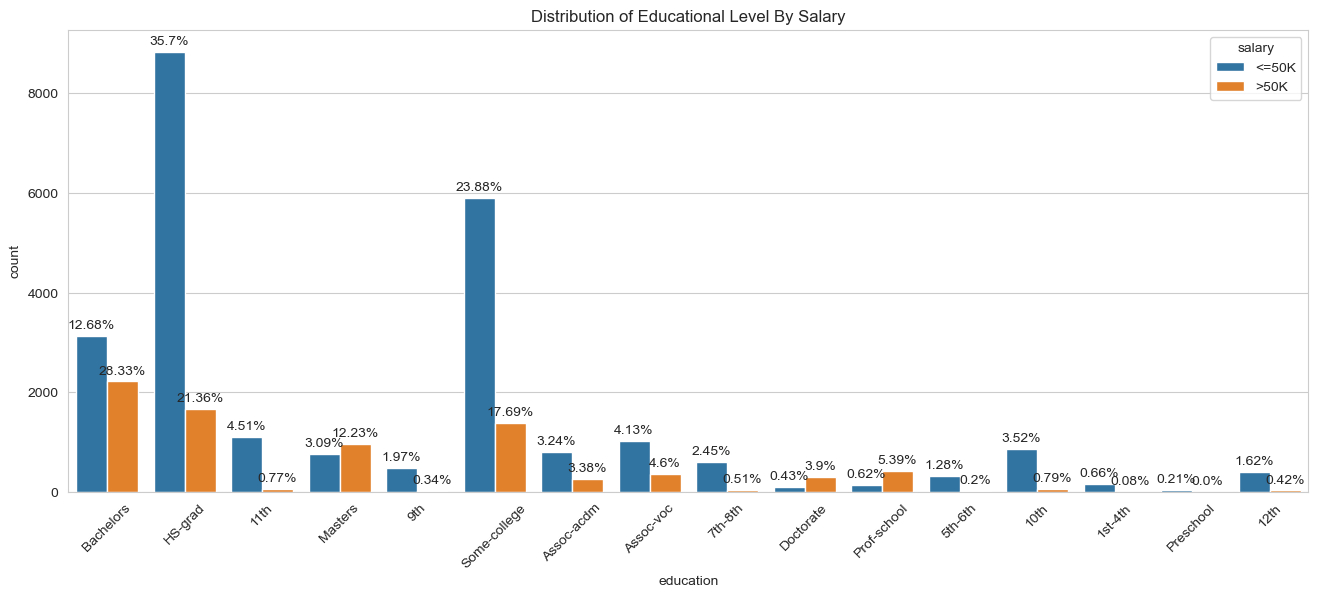

In [78]:
plt.figure(figsize=(16,6))
plt.title("Distribution of Educational Level By Salary")
two_plot = sns.countplot(x="education",data=df, hue="salary");
# Calculate the total count for each container
totals = []
for container in two_plot.containers:
    total = 0
    for bar in container:
        total += bar.get_height()
    totals.append(total)
# Add value labels as percentages inside the bar
for i, container in enumerate(two_plot.containers):
    for j, bar in enumerate(container):
        two_plot.annotate(str(round(bar.get_height()/totals[i]*100, 2)) + '%', 
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
two_plot.set_xticklabels(two_plot.get_xticklabels(), rotation=45);

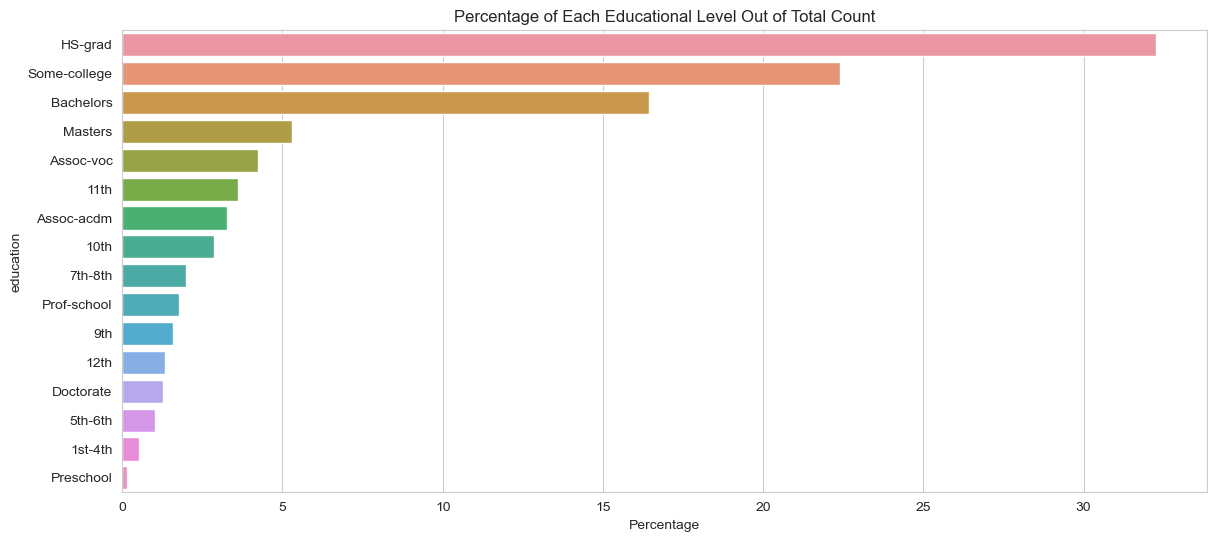

In [85]:
plt.figure(figsize=(14,6))
plt.title("Percentage of Each Educational Level Out of Total Count")
sns.barplot(data=df, y=education_pcnt.index, x=education_pcnt);
plt.xlabel("Percentage");

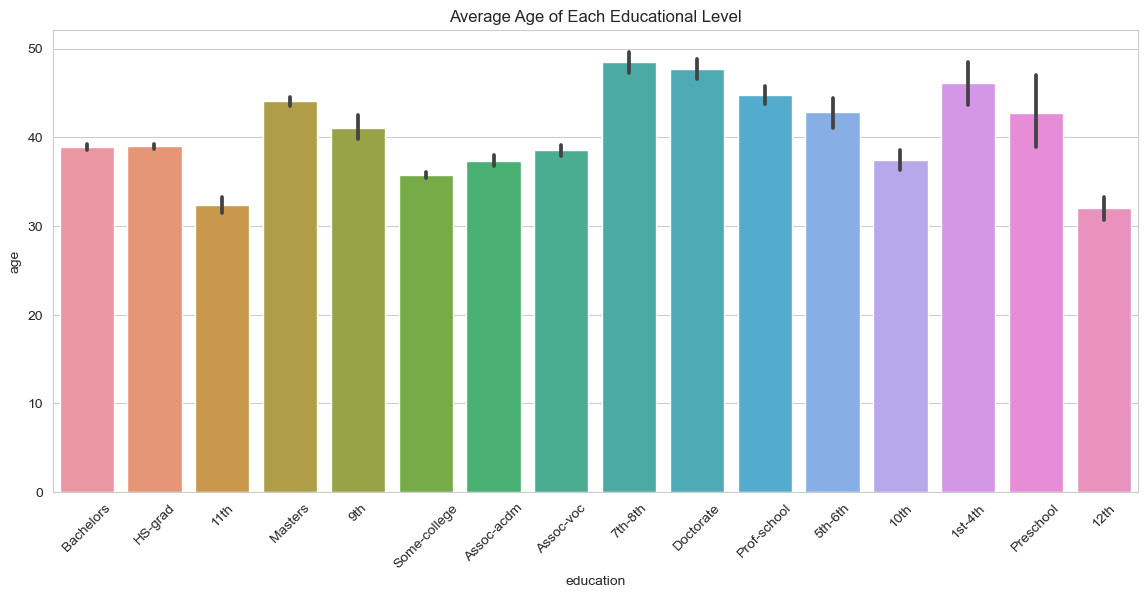

In [82]:
plt.figure(figsize=(14,6))
plt.title("Average Age of Each Educational Level")
one_plot = sns.barplot(data=df, x="education", y="age");
one_plot.set_xticklabels(one_plot.get_xticklabels(), rotation=45);